問題１  
ワインのデータセットの特徴量をpandasのデータフレームにして、各特徴量の相関を求めてください。  
またseabornを用いて可視化して、最も正の相関が高い特徴量二つを求めてください。  

Question１  
Please use the features of the wine dataset as a pandas data frame and find the correlation between each feature.  
Also, use seaborn to visualize and find the two features with the highest positive correlation.  

Wine Dataset DataFrame (first 5 rows):
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilut

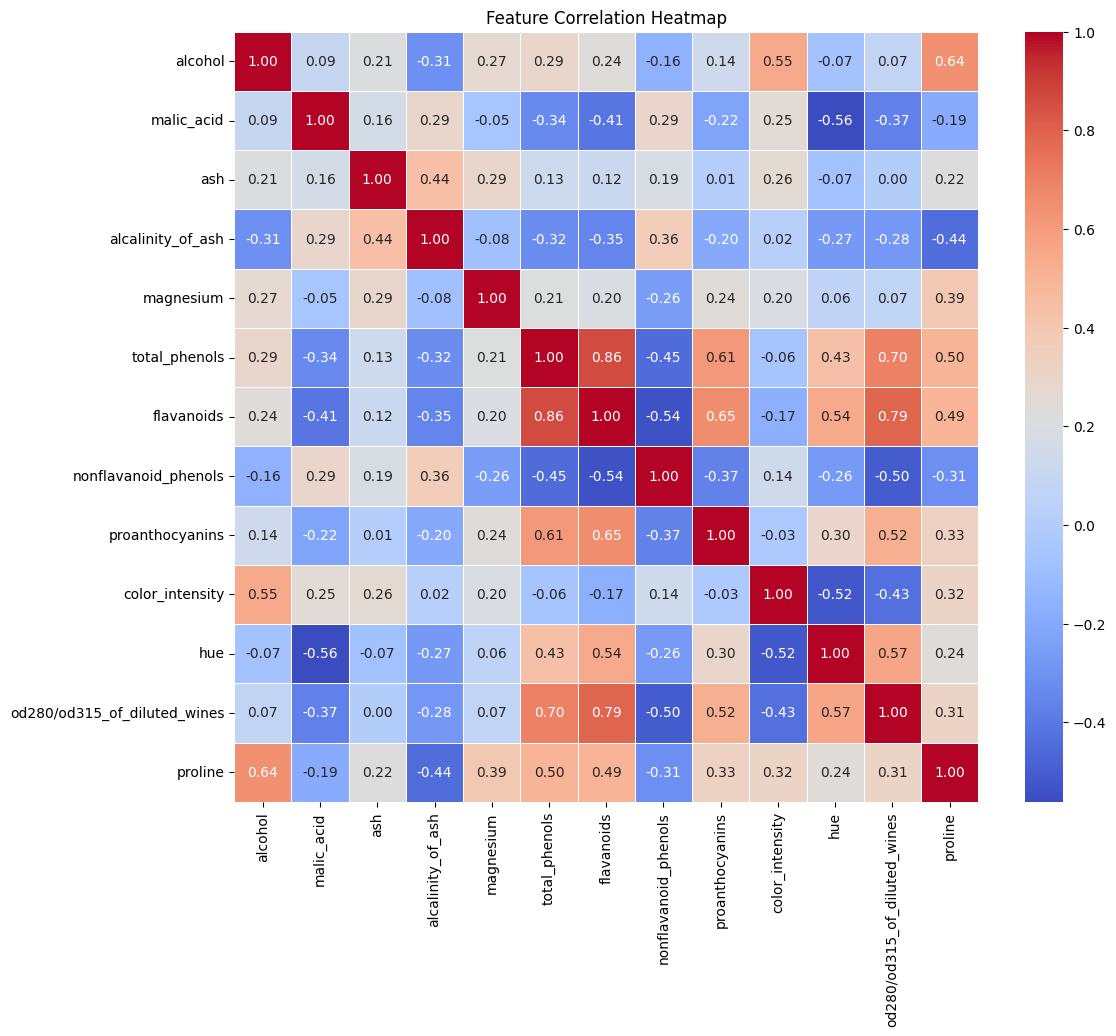


The two features with the highest positive correlation are: 'total_phenols' and 'flavanoids'
The correlation coefficient between them is: 0.8646


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# 1. ワインデータセットを読み込む
wine = datasets.load_wine()

# 2. pandas DataFrame に変換
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# データの一部と情報を表示
print("Wine Dataset DataFrame (first 5 rows):")
print(df_wine.head())
print("\nDataFrame Info:")
df_wine.info()

# 3. 相関行列を計算
correlation_matrix = df_wine.corr()
print("\nFeature Correlation Matrix:")
print(correlation_matrix)

# 4. 相関行列を可視化
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. 最も高い正の相関を持つ特徴量ペアを特定
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle_correlations = correlation_matrix.where(upper_triangle_mask)
stacked_correlations = upper_triangle_correlations.stack()

highest_corr_value = stacked_correlations.max()
highest_corr_features = stacked_correlations.idxmax()

print(f"\nThe two features with the highest positive correlation are: '{highest_corr_features[0]}' and '{highest_corr_features[1]}'")
print(f"The correlation coefficient between them is: {highest_corr_value:.4f}")


問題２  
標準化（平均０，標準偏差１）をする関数を作成してください。  
また、特徴量を５個、データ数１０個をもつ下のデータを、その関数を用いて標準化してください。  
更に、これらの値がsklearnのStandardScalerを用いて標準化したものと同じになることを確認してください。  

Question 2  
Create a function to standardize (mean 0, standard deviation 1).  
Also, standardize the data below, which has 5 features and 10 data, using that function.  
Furthermore, make sure that these values are the same as those standardized using sklearn's StandardScaler.  

In [ ]:
import numpy as np
dat = np.random.rand(10, 5)

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. カスタム標準化関数（平均0、標準偏差1）
def custom_standardize(data):
    """
    データを zスコアで標準化する。
    """
    mean_vals = np.mean(data, axis=0)
    std_devs = np.std(data, axis=0)
    standardized_data = (data - mean_vals) / std_devs
    return standardized_data

# 2. ランダムデータを生成（10行5列）
dat = np.random.rand(10, 5)
print("Original data (first 3 rows):")
print(dat[:3])

# 3. カスタム関数で標準化
custom_scaled_dat = custom_standardize(dat)
print("\nData standardized by custom function (first 3 rows):")
print(custom_scaled_dat[:3])
print(f"Mean after custom standardization (should be close to 0): {np.mean(custom_scaled_dat, axis=0)}")
print(f"Std after custom standardization (should be close to 1): {np.std(custom_scaled_dat, axis=0)}")

# 4. StandardScaler による標準化
scaler = StandardScaler()
sklearn_scaled_dat = scaler.fit_transform(dat)
print("\nData standardized by StandardScaler (first 3 rows):")
print(sklearn_scaled_dat[:3])
print(f"Mean after StandardScaler (should be close to 0): {np.mean(sklearn_scaled_dat, axis=0)}")
print(f"Std after StandardScaler (should be close to 1): {np.std(sklearn_scaled_dat, axis=0)}")

# 5. 結果の比較
are_they_close = np.allclose(custom_scaled_dat, sklearn_scaled_dat)
print(f"\nAre the results from custom function and StandardScaler close enough: {are_they_close}")

if are_they_close:
    print("The two standardization methods produce consistent results.")
else:
    print("The two standardization methods do not match. Please check the implementation.")


Original data (first 3 rows):
[[0.55222768 0.74561108 0.20087595 0.06963136 0.49604916]
 [0.82863489 0.28653699 0.00161988 0.47628436 0.47620046]
 [0.4936126  0.29085714 0.39674729 0.37808098 0.42986314]]

Data standardized by custom function (first 3 rows):
[[ 0.19273568  1.26013246 -0.82793408 -1.77898822 -0.21094723]
 [ 1.52655963 -0.71173911 -1.54391881  0.12976769 -0.29358377]
 [-0.0901158  -0.69318267 -0.12411165 -0.33118128 -0.48650107]]
Mean after custom standardization (should be close to 0): [-2.44249065e-16 -2.66453526e-16 -1.91513472e-16  3.61256164e-17
  1.22124533e-16]
Std after custom standardization (should be close to 1): [1. 1. 1. 1. 1.]

Data standardized by StandardScaler (first 3 rows):
[[ 0.19273568  1.26013246 -0.82793408 -1.77898822 -0.21094723]
 [ 1.52655963 -0.71173911 -1.54391881  0.12976769 -0.29358377]
 [-0.0901158  -0.69318267 -0.12411165 -0.33118128 -0.48650107]]
Mean after StandardScaler (should be close to 0): [-2.44249065e-16 -2.66453526e-16 -1.9151347

問題３  
sklearnのStandardScalerと同じように、"fit"で統計情報を取得して、"transform"で標準化を行い、"fit_transform"で統計情報の取得と標準化をおこなうクラス"Standardization"を作成してください。

Question 3  
Create a "Standardization" class that uses "fit" to obtain statistics, "transform" to standardize, and "fit_transform" to obtain and standardize statistics, just as sklearn's StandardScaler does.


In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler

import numpy as np  # NumPyライブラリをインポート

class Standardization:
    """
    sklearn.preprocessing.StandardScaler に似たカスタム標準化クラス
    """

    def __init__(self):
        self.mean_ = None           # 各特徴量の平均値を保存
        self.scale_ = None          # 各特徴量の標準偏差（0なら1に置き換え）
        self.n_features_in_ = 0     # 入力の特徴量の数を保存

    def fit(self, X, y=None):
        """
        平均と標準偏差を計算して保存する
        """
        X_array = np.asarray(X)  # 入力をNumPy配列に変換
        if X_array.ndim == 1:  # 1次元配列なら2次元に変換
            X_array = X_array.reshape(-1, 1)
        if X_array.ndim != 2:  # 2次元でなければエラー
            raise ValueError(f"Expected 2D array, got {X_array.ndim}D array instead.")

        self.n_features_in_ = X_array.shape[1]  # 特徴量の数を記録
        self.mean_ = np.mean(X_array, axis=0)   # 各列の平均を計算
        std_dev = np.std(X_array, axis=0)       # 各列の標準偏差を計算
        self.scale_ = np.where(std_dev == 0, 1.0, std_dev)  # 標準偏差0なら1に置き換え
        return self  # 自身を返す（メソッドチェーン用）

    def transform(self, X):
        """
        fitで得た値を使ってXを標準化する
        """
        if self.mean_ is None or self.scale_ is None:  # fitされてなければエラー
            raise RuntimeError("This Standardization instance is not fitted yet. Call 'fit' first.")

        X_array = np.asarray(X)  # 入力をNumPy配列に変換
        if X_array.ndim == 1:  # 1次元配列なら2次元に変換
            X_array = X_array.reshape(-1, 1)
        if X_array.ndim != 2:  # 2次元でなければエラー
            raise ValueError(f"Expected 2D array, got {X_array.ndim}D array instead.")
        if X_array.shape[1] != self.n_features_in_:  # 特徴数がfit時と違うならエラー
            raise ValueError(f"X has {X_array.shape[1]} features, but fitted with {self.n_features_in_}.")

        return (X_array - self.mean_) / self.scale_  # 標準化して返す

    def fit_transform(self, X, y=None):
        """
        fitしてからtransformを行う
        """
        self.fit(X, y)             # 平均と標準偏差を計算
        return self.transform(X)   # 標準化した結果を返す

# --- テスト ---
if __name__ == '__main__':
    # テスト1：一般的なデータ（特徴量3つ）
    data1 = np.array([[1, 10, 100],
                      [2, 20, 200],
                      [3, 30, 300],
                      [4, 40, 400],
                      [5, 50, 500]])

    # テスト2：標準偏差がゼロの列を含むデータ
    data_zero_std = np.array([[1, 5, 10],
                              [2, 5, 20],
                              [3, 5, 30]])

    print("--- Test: data1 ---")
    custom_scaler = Standardization()
    custom_scaler.fit(data1)
    print("Custom Mean:", custom_scaler.mean_)
    print("Custom Scale:", custom_scaler.scale_)
    transformed_data_custom = custom_scaler.transform(data1)
    print("Custom Transformed:\n", transformed_data_custom)
    print("Mean ~0:", np.mean(transformed_data_custom, axis=0))
    print("Std ~1:", np.std(transformed_data_custom, axis=0))

    # fit_transform メソッドの確認
    custom_scaler_ft = Standardization()
    transformed_data_custom_ft = custom_scaler_ft.fit_transform(data1)
    print("\nCustom fit_transform:\n", transformed_data_custom_ft)

    # sklearn の標準化と比較
    sklearn_scaler = StandardScaler()
    transformed_data_sklearn = sklearn_scaler.fit_transform(data1)
    print("\nSklearn Mean:", sklearn_scaler.mean_)
    print("Sklearn Scale:", sklearn_scaler.scale_)
    print("Sklearn Transformed:\n", transformed_data_sklearn)

    print("\nAre results close?", np.allclose(transformed_data_custom_ft, transformed_data_sklearn))

    print("\n--- Test: data_zero_std ---")
    custom_scaler_zs = Standardization()
    transformed_data_custom_zs = custom_scaler_zs.fit_transform(data_zero_std)
    print("Custom ZS Transformed:\n", transformed_data_custom_zs)

    sklearn_scaler_zs = StandardScaler()
    transformed_data_sklearn_zs = sklearn_scaler_zs.fit_transform(data_zero_std)
    print("Sklearn ZS Transformed:\n", transformed_data_sklearn_zs)

    print("Are ZS results close?", np.allclose(transformed_data_custom_zs, transformed_data_sklearn_zs))

    print("\n--- Test: 1D input ---")
    data_1d = np.array([10, 20, 30, 40, 50])
    custom_scaler_1d = Standardization()
    transformed_1d_custom = custom_scaler_1d.fit_transform(data_1d)
    print("Custom 1D Transformed:\n", transformed_1d_custom)

    sklearn_scaler_1d = StandardScaler()
    transformed_1d_sklearn = sklearn_scaler_1d.fit_transform(data_1d.reshape(-1, 1))
    print("Sklearn 1D Transformed:\n", transformed_1d_sklearn)

    print("Are 1D results close?", np.allclose(transformed_1d_custom, transformed_1d_sklearn))

    print("\n--- Test: transform before fit ---")
    try:
        unfitted = Standardization()
        unfitted.transform(data1)
    except RuntimeError as e:
        print(f"Caught error: {e}")

    print("\n--- Test: mismatched feature count ---")
    try:
        fitted = Standardization()
        fitted.fit(data1)
        fitted.transform(np.array([[1, 2], [3, 4]]))
    except ValueError as e:
        print(f"Caught error: {e}")


--- Test: data1 ---
Custom Mean: [  3.  30. 300.]
Custom Scale: [  1.41421356  14.14213562 141.42135624]
Custom Transformed:
 [[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]
Mean ~0: [0. 0. 0.]
Std ~1: [1. 1. 1.]

Custom fit_transform:
 [[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]

Sklearn Mean: [  3.  30. 300.]
Sklearn Scale: [  1.41421356  14.14213562 141.42135624]
Sklearn Transformed:
 [[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]

Are results close? True

--- Test: data_zero_std ---
Custom ZS Transformed:
 [[-1.22474487  0.         -1.224744

問題４  
クラス０と１に分類する問題において、下のデータでyは実際のクラスであり、probaはクラス１に分類される確率であるとします。このとき、確率が0.3以上のものをクラス１として予測するとしたときの、偽陽性率FP/(FP+TN)と真陽性率TP/(TP+FN)を求めてください。

Question 4  
In the problem of classifying into classes 0 and 1, let "y" be the actual class in the data below and "proba" be the probability of being classified as class 1. Find the false positive rate FP/(FP+TN) and the true positive rate TP/(TP+FN), where the data with a probability of 0.3 or grater is predicted as class 1.

In [10]:
y_actual  = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])
proba_class1  = np.array([0.92835106, 0.92211257, 0.97461182, 0.57034367, 0.93305898,
       0.62405417, 0.97317274, 0.77208564, 0.65920131, 0.61843998,
       0.67692871, 0.97317274, 0.96823195, 0.72812532, 0.67453055,
       0.89860002, 0.78882425, 0.97461182, 0.97461182, 0.05674868,
       0.03728005, 0.03550546, 0.93279638, 0.96524839, 0.97461182,
       0.96845277, 0.85607053, 0.96633628, 0.97317274, 0.91842985,
       0.97461182, 0.80513948, 0.97461182, 0.97461182, 0.95759579,
       0.97317274, 0.65623417, 0.03550546, 0.23221195, 0.57602591,
       0.08521943, 0.30281402, 0.97461182, 0.76375157, 0.42925288,
       0.97461182, 0.03392148, 0.60325005, 0.0428371 , 0.05232577,
       0.03800179, 0.03728005, 0.03392148, 0.92918884, 0.70673672,
       0.03392148, 0.97461182, 0.88699911, 0.04400415, 0.05201245,
       0.05594251, 0.04642406, 0.901967  , 0.03750075, 0.80658182,
       0.87283437, 0.03910057, 0.03550546, 0.38126245, 0.03392148,
       0.97461182, 0.06224534, 0.97461182, 0.30769369, 0.03392148,
       0.95133849, 0.10710488, 0.94926085, 0.97461182, 0.03392148,
       0.04484007, 0.47554533, 0.97461182, 0.97088965, 0.0369083 ,
       0.97343535, 0.35992931, 0.97358241, 0.04816328, 0.43353988,
       0.09735661, 0.63121774, 0.09204896, 0.04117802, 0.96976967,
       0.97343535, 0.03550546, 0.03392148, 0.03392148, 0.49185175])

In [12]:
# 設定された確率しきい値
threshold = 0.3

# 1. しきい値に基づき予測ラベルを決定
y_pred = (proba_class1 >= threshold).astype(int)

# 2. 混同行列の各要素を計算
tp = np.sum((y_actual == 1) & (y_pred == 1))  # 真陽性
fp = np.sum((y_actual == 0) & (y_pred == 1))  # 偽陽性
tn = np.sum((y_actual == 0) & (y_pred == 0))  # 真陰性
fn = np.sum((y_actual == 1) & (y_pred == 0))  # 偽陰性

print(f"Threshold: {threshold}")
print(f"TP (True Positives): {tp}")
print(f"FP (False Positives): {fp}")
print(f"TN (True Negatives): {tn}")
print(f"FN (False Negatives): {fn}")

# 3. FPR と TPR を計算
# FPR = FP / (FP + TN)
if (fp + tn) == 0:
    fpr = 0.0
    print("Warning: (FP + TN) is 0, FPR cannot be calculated.")
else:
    fpr = fp / (fp + tn)

# TPR = TP / (TP + FN)
if (tp + fn) == 0:
    tpr = 0.0
    print("Warning: (TP + FN) is 0, TPR cannot be calculated.")
else:
    tpr = tp / (tp + fn)

print(f"\nFalse Positive Rate (FPR) = FP / (FP + TN) = {fp} / ({fp} + {tn}) = {fpr:.4f}")
print(f"True Positive Rate (TPR) = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {tpr:.4f}")


Threshold: 0.3
TP (True Positives): 63
FP (False Positives): 3
TN (True Negatives): 32
FN (False Negatives): 2

False Positive Rate (FPR) = FP / (FP + TN) = 3 / (3 + 32) = 0.0857
True Positive Rate (TPR) = TP / (TP + FN) = 63 / (63 + 2) = 0.9692
